# Homework 2: Convolutions and Spike Trains
## Due: Tuesday, December 17, 11:59pm

## Part 1: Convolutions

### Math Exercises - Convolutions

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?

1. First of all I will introduce the formula for discrete convolution.
$$(f \ast g)[n]=\sum_{m=-\infty}^{\infty} f[m] g[n-m]$$
2. Convolution is defined as the integral of the product of two functions, after one is reversed.
In order to preform the operation we first of all want to reverse one of the functions (array).

$$ B^R = [3,2,1] $$
3. Then we want to create a new array which will hold the convolution of the two functions, the new array
will be built out of the dot product of the two arrays while the reversed array is "sliding" through the original array.

$$ B^R \ast A = [3*3, 2*3 + 3*4, 1*3 + 2*4 + 3*5, 1*4 + 2*5 + 3*6, 1*5 + 2*6 + 3*2, 1*6 +2*2, 1*2] = [9 , 18 , 26 ,32 , 23 , 10, 2]$$

The convultion of the two arrays created a new array with different dims.
We saw in the lecture that using covlution and the Dirac delta function we can create a filter, to interpert Neuronal spikes.

### Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

We have two functions of discrete-time signals $x[n]$ and $y[n] $$\\$
We know that $h[n] = x[n]*y[n]$
But a faster/cheaper way to compute this will be to use the FFT, in to do it we want to to multiply the functions in the frequency domain rather the time domain, then we can inverse the transform to get the time domain signal.$\newline$
h[n] = IFFT((FFT(x[n]) * FFT(y[n]))) $\newline$
This method is much more effifcient than the time-domain method, in particular for large neural datasets.$\newline$
While FFT is O(NlogN),  the time-domain method, is O(N^2).$\newline$
Big - O notation is the measure of complexity of an algorithm.

### Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?

Finite Impulse response (FIR) Filter: $\newline$
Takes the average of the N(window size) consequent samples from the input saves it in a new list, going to the next element
in the input list adn so on untill it reaches the end of the input list.$\newline$
So for $S = [2,3,4,5,6,7,8,9,10]$ and $N = 3$
 $\newline$ The output will be calculated as such: $\newline$

 $ F = [\frac{2+3+4}{3}, \frac{3+4+5}{3}, \frac{4+5+6}{3}, \frac{5+6+7}{3}, \frac{6+7+8}{3}, \frac{7+8+9}{3}, \frac{8+9+10}{3}] = [3,4,5,6,7,8,9] $ $\newline$
 The moving average filters are usefull to reduce noise in the data, this happens by taking the average of the N consequent samples which smoothens the data.


### Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

### Utilize the Convolution Operator From Standard Libraries
Show using Python's `numpy.convolve`
that convolution is a commutative operator.

In [10]:
import numpy as np
a =[1,2,3]
b = [4,5,6]
## we wnat to show taht aconv(b) = bconv(a)
ab = np.convolve(a,b)
ba = np.convolve(b,a)

if np.array_equal(ab,ba):
    print("It's commulative")
else:
    print("It's not commulative")

It's commulative
[0 0 0]


### Write Your Own Convolution Function
Convolve these two signals first with the mentioned functions, and then with your
own code. Write a function that convolves two signals without using any external libraries' built-in convolution function (more general functions such as `np.dot` are permissable).

`x = [1 5 7 9 3 3 3 9 8] ; y = [1 3]`

The convolution should be done in the 'full' mode, meaning that all possible
multiplications of these signals should occur. Remember, The definition of
convolution is: $(x*y)[n] = \sum_{n \in \mathbb{Z}}{x[m] y[m-n]}$. Additionaly,
take note that Matlab flips the second vector that enters the `conv`
function.

In [172]:
def my_conv(a,b):
    n = len(a) + len(b) - 1
    c = np.zeros(n)
    for i in range(len(a)):
            for j in range(len(b)):
                c[i+j] += a[i]*b[j]
    return c

In [175]:
print(my_conv([1,2,3],[1,2,3,4,5,6]))

[ 1.  4. 10. 16. 22. 28. 27. 18.]


In [176]:
print(np.convolve([1,2,3],[1,2,3,4,5,6]))

[ 1  4 10 16 22 28 27 18]


<a id="question-5"></a>
### Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all of the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

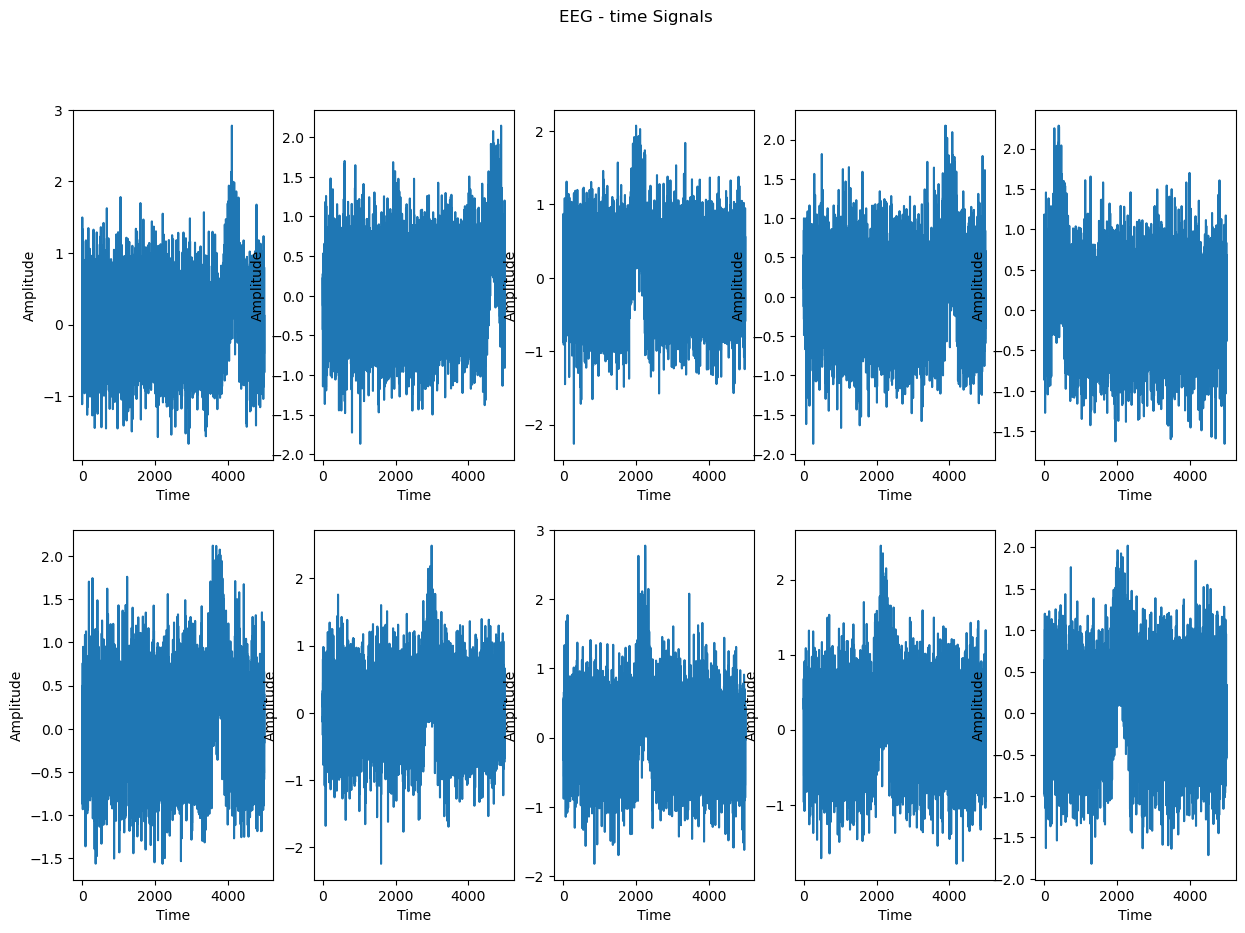

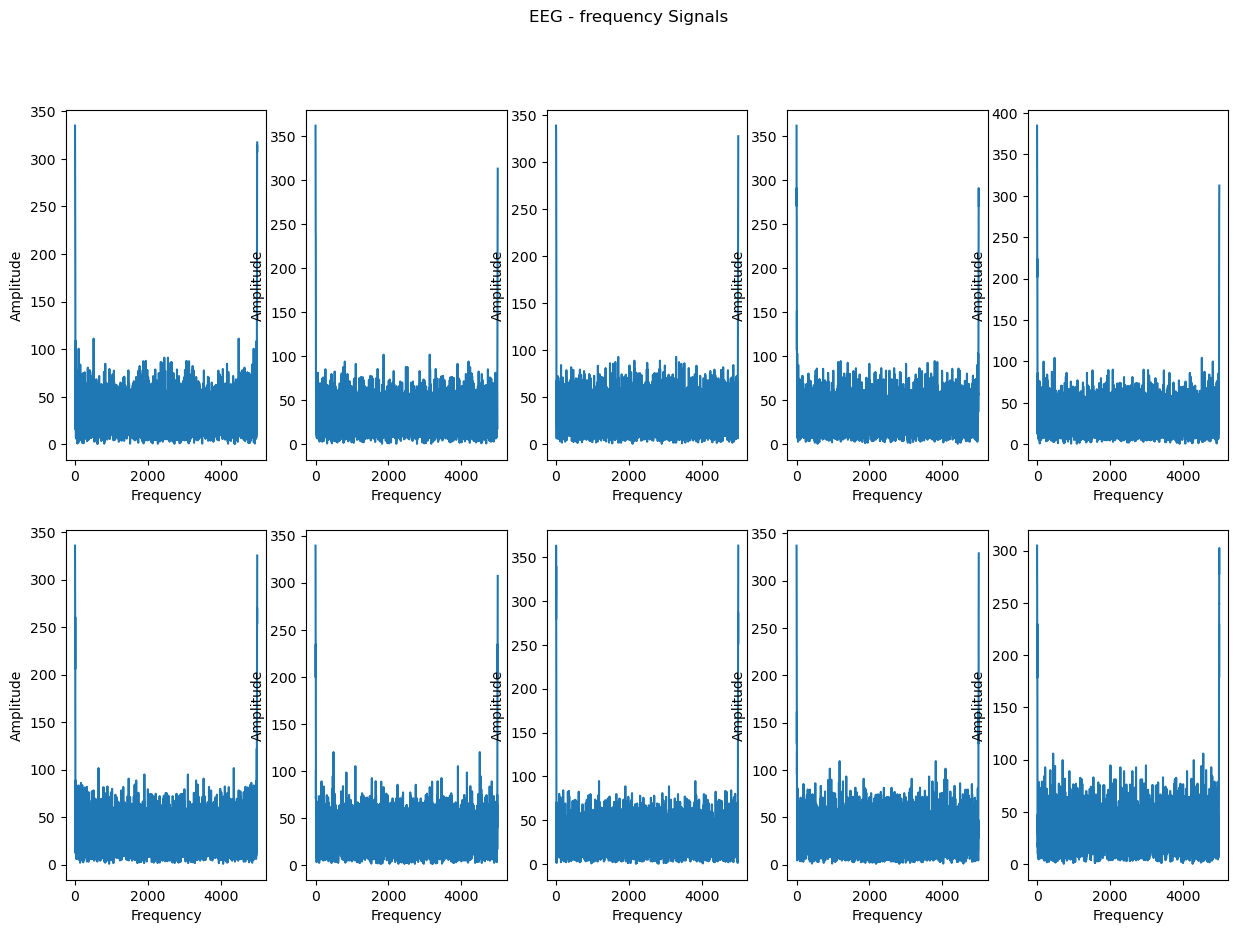

In [95]:
import pickle
import matplotlib.pyplot as plt
eeg = np.array(pickle.load(open("eeg_signals.pkl", 'rb')))
plt.figure(figsize=(15,10))
plt.suptitle("EEG - time Signals")
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(eeg[i])
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.figure(figsize=(15,10))
plt.suptitle("EEG - frequency Signals")
for i in range(10):
    plt.subplot(2,5,i+1)

    fft_signal = np.fft.fft(eeg[i])
    #freqs = np.fft.fftfreq(len(eeg[i]))
    
    # Plot only positive frequencies (half of the spectrum)
    plt.plot( np.abs(fft_signal))
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")


(10, 5000)

for the time domain we can see that each of the recording had a potetential peak at different time, but if we look at the frequency domain we can see that they are all at the same frequency. 

### Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.


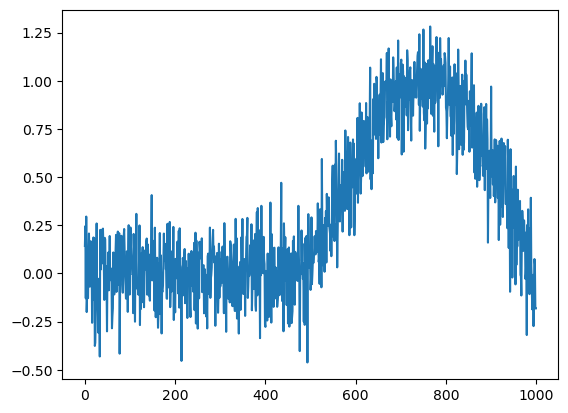

In [215]:
with open("erp_timestamps.txt",'r') as f:
    line = f.readlines()
    erp_time_stamps = np.array([float(x.strip()) for x in line])
# I assusme that the timestamps are in seconds and the eeg is in milliseconds
erp_time_stamps = np.int_(np.round(erp_time_stamps*1000))
#let's define window around the erp
window =500 #ms
## There is two specific signal that I want to pad in order to use this window, so I will pad the whole data set to keep them alligned
eeg_padded = np.array([np.pad(sig, (window,window)) for sig in eeg])

erp_segments = np.zeros((len(erp_time_stamps),2*window))

for i in range(len(erp_time_stamps)):
    start = erp_time_stamps[i] 
    end = erp_time_stamps[i] + 2*window
    erp_segments[i] = eeg_padded[i][start:end]
avereged_erp = np.mean(erp_segments, axis=0)

plt.plot(avereged_erp)


In [216]:
avereged_erp.shape

(1000,)

Due to the averaged ERP signal, we first of all reduce the noise (due to averging). Then we can see the properties of the ERP signal such as the peak and the latency. The main down side of this approach is that we are loosing due to the averaging the some of the variability between records.

<a id="question-8"></a>
### Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

**Use your convolution function from the previous steps**

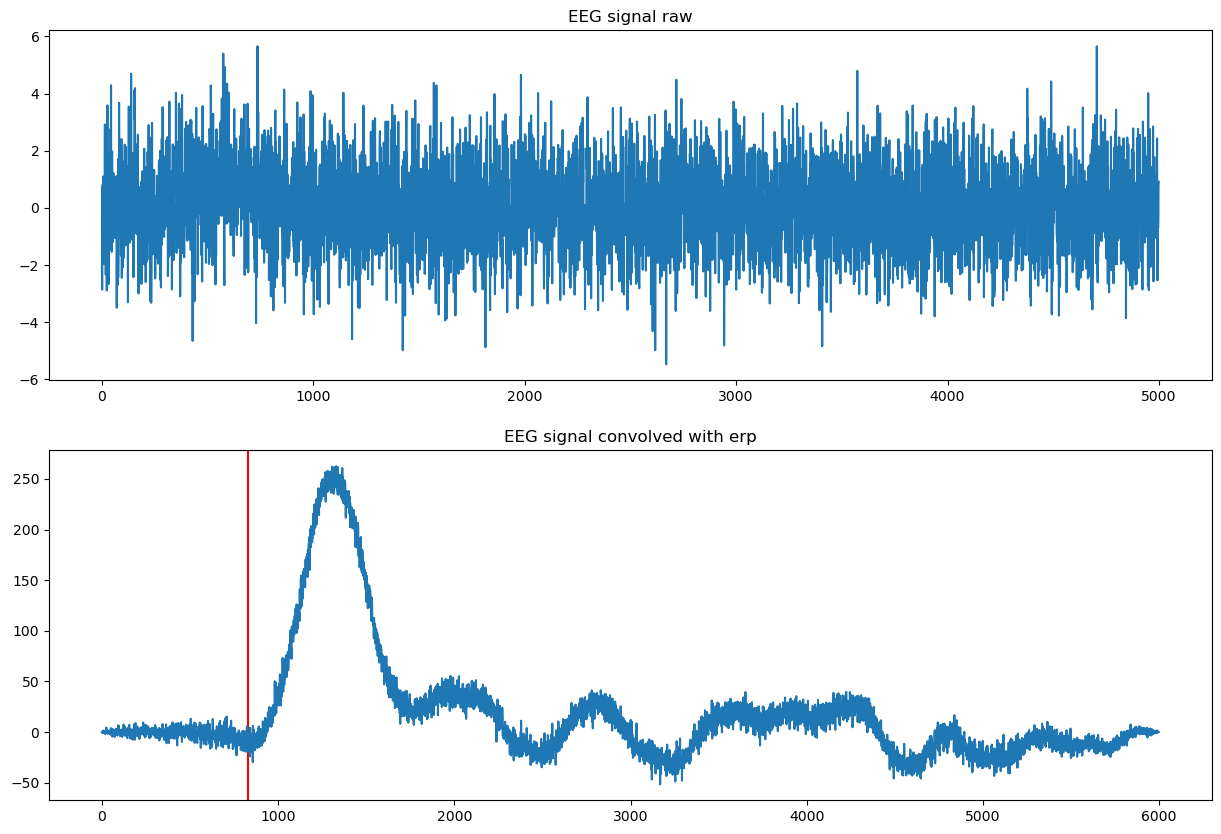

In [220]:
eeg_1 = pickle.load(open("eeg_signal_to_analyze.pkl", 'rb'))
eeg_conv_erp = my_conv(eeg_1,avereged_erp)
eeg_conv_erp = eeg_conv_erp
erp_point = np.argmax(eeg_conv_erp) - window ## this should the point of the erp,because I added pre and post window
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.title("EEG signal raw")
plt.plot(eeg_1)

plt.subplot(2,1,2)
plt.title("EEG signal convolved with erp")
plt.axvline(erp_point,color="red")
plt.plot(eeg_conv_erp)

As we can observe, convolving the ERP with the EEG signal helped us to identify the event in the EEG signal.
It happened because the places where the template of the signal matched the template of the ERP got a higher value after the convolution. There is a problem with that approach though, since we are using the ERP as a template, we might not be able to detect the event if the template does not match the event. or vice versa, detect nonesence as event if the template matches the event.
 

## Part 2: Poisson Spike Trains

In this question we'll create and work with a spike train. The idea is to create a set of functions that can be used for your spike train analysis pipeline. These function should be reusable. The functions or modules you should define are:

- `readPoiSpikes`
- `generatePoiSpikes`
- `calcFF`
- `calcCV`
- `alcRate`

In this week's directory in the GitRepo,  there are two spiketrain datasets named `rawSpikes1.mat` and `rawSpikes2.mat`. They both should be placed into 1 ms bins. The spike times there are in milliseconds.

**Write each function inside a jupyter code cell or python file. Upload a PDF to your gitrepo of the outputs of each of your functions for both the provided spike trains and the one you generate.

Use the following parameters to test out your code:

```python
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds
```

#### Load Data

Write a function that loads a dataset in the format of the spike train files in this gitrepo and outputs it as a spike train with a set binwidth. The function has to be able to read both column and row vectors, and should be robust to empty datasets.


```python

def readPoiSpikes(fileName, Fs,binSize = 0.01,totalTime=30):
    '''
    The fileName is the name of the file to be read,
    If the file is in the directory of the script, the path is not needed
    otherwise, the path needs to be full 
    '''
    
    
    data = loadmat(fileName)
    rawspike = np.array(data['spikes'])
    rawspike = rawspike.flatten()
    n_bins = int(totalTime/binSize)
    if rawspike.size == 0:
        raise ValueError("The file is empty")
    
    bins = np.linspace(0,totalTime,n_bins+1)
    spikeTrain= np.histogram(rawspike, bins=bins)
    
    return spikeTrain
```

#### Generate Spike Trains

Write a function that generates a spike train, according to the Poisson process model and the explanation that was given in the exercise, under the "Poisson Generator" section. This function should run only if we didn't load a spike train earlier (don't just comment out the previous function). Here we assume $r(t)=r$ and
$P(\text{spike occurred}) = r\Delta t$ for short $\Delta t$. That means that we're considering a homogeneous process in this case. Make sure all operations are done in a vectorized manner, no loops!

```python
def generatePoiSpikes(r, dt, totalSize):
    rand = np.random.rand(totalSize)
    spikeTrain = np.zeros(totalSize)
    spikeTrain[rand>r*dt] = 1
    

    return spikeTrain
```

#### Fano Factor and Coefficient of Variation

After we have a spike train at hand, we want to check whether the spikes are indeed Poisson-distributed. The two ways to check it were discussed in class: the Fano Factor and Coefficient of Variation. Write two functions that check these parameters for the spike trains.

Calculate the CV and FF of the two given spike trains and the one you generated. Consider carefully how to calculate the FF of a **single** spike train.

```python
def calcCV(spikeTrain):
    spike = np.where(spikeTrain==1)
    isi = np.diff(spike)
    CV = np.std(isi)/np.mean(isi)
    
    return CV
```


```python
def calcFF(spikeTrain):

    FF = np.var(spikeTrain)/np.mean(spikeTrain)
    
    return FF
```

#### Rate of fire

Lastly we'll check the rate of fire of our neurons. The function should receive a spike train and length of the window in which it should calculate the rate. Length = 0 means that it should just return the average rate of fire of the whole train. A different window requires you to calculate the firing rate in that window, and plot the results over time - $r(t)$. Make sure the function is robust for all types of inputs. Calculate the rate of fire for the two given spike trains and the one you generated

```Python
def calcRate(spikeTrain, window, dt):

    if window == 0:
        spike = np.where(spikeTrain==1)[0]
        r = np.mean(np.diff(spike))*dt ## in seconds
        return 1/r
    window_bins = int(window/dt)
    rateOfFire = []
    
    for i in range(0,len(spikeTrain),window_bins):
        window_c = np.sum(spikeTrain[i:i+window_bins])
        rate = (window_c/window) 
        rateOfFire.append(rate)
    return rateOfFire
```